<p style="font-family: Arial; font-size:2.70em;color:purple; font-style:bold">
GPA over Successive Semester Visualization
</p>
<br>


Importing Necessarry Libraries <br>
Here, I am will use "Seaborn" and "plotly" to show visualization.
1. Seaborn **swarm plot** visualization
2. Plotly **Animation scatter plot** visualization

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('FDU_Data.csv', sep =",")
print(type(data))
print("Shape will show number of rows and columns in DataFrame (rows,columns):",data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
Shape will show number of rows and columns in DataFrame (rows,columns): (1262, 43)


,REC_ID,FILETERM,FTERMA,FILEDATE,COURSE,CRSLEVEL,CDEPT,CNUM,CTITLE,MINCREDS,...,SATVERB,SATMATH,SATWRITE,ACT,Wordcount,ZYBooks_Timeliness,ZYBooks_Curiosity,Weighted_Midterm_Total,Weighted_Final_Total,Word_Count
0,3878,201509,201509,9/1/2015,EGTM_2232,2,EGTM,2232,Mechanical Measurement/Devices,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
1,3878,201509,201509,9/1/2015,ENGR_1301,1,ENGR,1301,"Engr Pract, Graphics and Des",3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
2,3878,201509,201509,9/1/2015,ENWR_1101,1,ENWR,1101,Academic Writing,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
3,3878,201509,201509,9/1/2015,MATH_1105,1,MATH,1105,College Algebra,4,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
4,3878,201602,201602,2/1/2016,EGTC_1223,1,EGTC,1223,Introduction to CAD,2,...,450,460,480,,,1500.0,700.0,68.6,90.25,296


In [3]:
data.columns

Index(['REC_ID', 'FILETERM', 'FTERMA', 'FILEDATE', 'COURSE', 'CRSLEVEL',
       'CDEPT', 'CNUM', 'CTITLE', 'MINCREDS', 'MaxCredits', 'Grade', 'UGGR',
       'FT_PT', 'REGCREDS', 'ADMSTAT', 'SPECSRV1', 'SPECSRV2', 'CATEGORY',
       'ACADEMICPROGRAM', 'ACADEMICPROGRAMDESCRIPTION', 'STARTTRM', 'SEX',
       'AGE', 'ALIEN', 'NEWETH', 'COMBETH', 'CLASS', 'CUMATT', 'CUMCRED',
       'CUMGPA', 'CUMPTS', 'HSNAME', 'SATVERB', 'SATMATH', 'SATWRITE', 'ACT',
       'Wordcount', 'ZYBooks_Timeliness', 'ZYBooks_Curiosity',
       'Weighted_Midterm_Total', 'Weighted_Final_Total', 'Word_Count'],
      dtype='object')

## What do we need?

1. Each student. (REC_ID)
2. GPA (CUM_GPA)
3. Term (FILE_TERM)

In [4]:
df = data[['REC_ID','FILETERM','CUMGPA']]

In [5]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
1,3878,201509,0
2,3878,201509,0
3,3878,201509,0
4,3878,201602,2.639


In [6]:
df.shape[0]

1262

## Data cleaning process

In [7]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA      False
dtype: bool

In [8]:
df['CUMGPA'].str.contains(' ').any()

True

In [9]:
df['CUMGPA'] = df['CUMGPA'].replace(' ', np.nan)

C:\Users\Hemang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA       True
dtype: bool

In [11]:
df = df.dropna()

In [12]:
df.shape[0]

1256

## Duplicate removing:

<b>We have duplicate data which we can not use to plot the graph. So, we have to remove the duplicate data.</b>

In [13]:
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()

In [15]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
4,3878,201602,2.639
10,3878,201609,3.061
16,3878,201702,3.107
20,5213,201509,0


In [16]:
df.shape[0]

223

## Plotting swarm plot using seaborn :

<p>Notice here, we convert the data type of CUMGPA column to plot the data on graph. </p>

In [17]:
df.dtypes

REC_ID       int64
FILETERM     int64
CUMGPA      object
dtype: object

In [18]:
df['CUMGPA'] = df['CUMGPA'].astype(float)

In [19]:
df.dtypes

REC_ID        int64
FILETERM      int64
CUMGPA      float64
dtype: object

<b>Seaborn plotting:</b>
1. hue = "REC_ID" will separte the data points by record id which is unique to each student. It will color data for each student differently.
2. dodge = True will separate the overlapping data points. For example, if 2 students have same GPA in same TERM then that overlapping will be separated.
3. g.legend_.remove() will remove the legend. Because, over legend will be too long to show.(It will have color representation for each REC_ID)

In [20]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

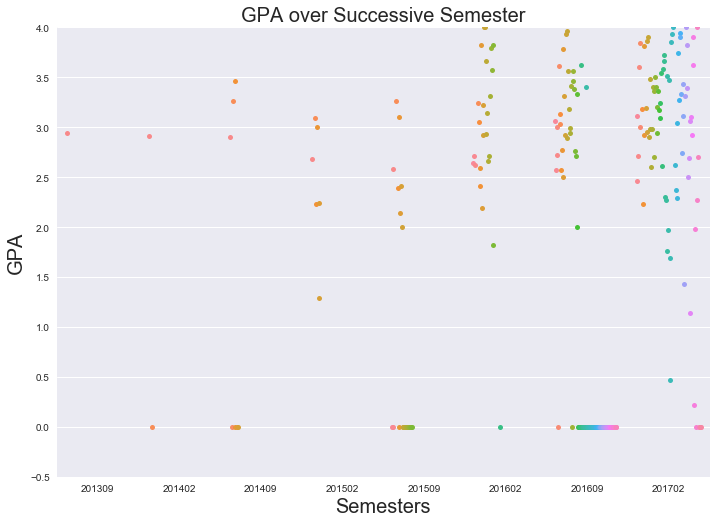

In [21]:
g = sns.swarmplot(x = 'FILETERM', y = 'CUMGPA', data = df,hue = 'REC_ID', dodge = True)

plt.title("GPA over Successive Semester", fontsize = 20)
plt.xlabel("Semesters", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.ylim(-0.5,4)
g.legend_.remove()
plt.show()

## Plotly plotting:

<p style="color:red">The plotly animation effect is quite mesmerizing. However, our plot will have following issues which can later be fixed. I tried to fix it. But it doen't fit with the presentation i wanted.</p>
1. Issue with animation speed. (I want transition to be on speed so that we can see each data point.)
    * The speed currently is too much fast to observe one student proparly. I tried different combination for frame {duration: value} attribute and frame{transition: value} attribute. But for some reason it doesn't align properly.
2. X-axis dynamicness (it changes with each student(REC_ID), which is indeed part of animation but i want it to be fixed in place.)
    * I tried to give list of specific values for x and also used minimum and maximum value. But still the result was the same. It was changing every time the frame being "redraw". I guess that is how the animation event is handled by the plotly. 
<br>
<br><h3>
<a href="https://plot.ly/python/animations/#using-a-slider-and-buttons">Here is the link to full example, I used as reference to create this animation. </a></h3>

In [22]:
df['FILETERM'] = df['FILETERM'].astype(str)

In [23]:
df.dtypes

REC_ID        int64
FILETERM     object
CUMGPA      float64
dtype: object

In [24]:
df['FILETERM'][:5]

0     201509
4     201602
10    201609
16    201702
20    201509
Name: FILETERM, dtype: object

### Mapping FILETERM to values so we won't have values like 201302..etc.

In [25]:
terms = {'201302':'Spring 2013','201309':'Fall 2013','201402':'Spring 2014','201409':'Fall 2014','201502':'Spring 2015',
         '201509':'Fall 2015','201602':'Spring 2016','201609':'Fall 2016','201702':'Spring 2017','201709':'Fall 2017'}

In [26]:
df['FILETERM'] = df['FILETERM'].replace(terms)

In [27]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,Fall 2015,0.000
4,3878,Spring 2016,2.639
10,3878,Fall 2016,3.061
16,3878,Spring 2017,3.107
20,5213,Fall 2015,0.000


## List of unique record id will be used to iterate over each student

In [28]:
records = df['REC_ID'].unique().tolist()

In [29]:
records[:8]

[3878, 5213, 8197, 9357, 10372, 10532, 11064, 11488]

In [30]:
min(records),max(records)

(3878, 19623)

In [31]:
from IPython.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

## How animation works? 

* **It works like a Video.**
    <p>
    To show animation. We have to create frames to show one by one while animating the figure. Just like video works. Video is collection of frames which runs on some predefined speed which generates animation called video.
    </p>
    <br>
* **How it works in plotly?**
<p>
To show first frame we will get the data to start our animation and we will store it in "data[]" list of figure dictionary. After that we will make list of frames and store it in "frames[]" list which will be showed during animation.
</p>

In [89]:
#Make figure

figure = {
    'data': [],# First frame would go here as data to show initial figure.
    'layout':{}, # Layout will have asthetic of figure or graph.
    'frames':[] #Frames will be used to show animation. 
}

<p>Getting minimum and maximum values to plot on axis.</p>

In [62]:
x_min,x_max = df['FILETERM'].min(), df['FILETERM'].max()
x_min,x_max

('Fall 2013', 'Spring 2017')

In [63]:
y_min, y_max = df['CUMGPA'].min(), df['CUMGPA'].max()
y_min, y_max

(0.0, 4.0)

### Filling out layout of figure.

In [90]:
# Let's fill in most layout

figure['layout']['xaxis'] = {'range':[x_min,x_max],'autorange': False, 'title': 'File Term'}
figure['layout']['yaxis'] = {'range':[-0.5,4.5],'autorange': False,'title': 'GPA'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 800,
            'easing': 'cubic-in-out' # Effect of animation : use elastic inplace of cubic-in-out
        }
    ],
    'initialValue': '3878', # initial value in slider component which will be first student's REC_ID
    'plotlycommand': 'animate',
    'values': records,
    'visible': True # Determines visibility of slider.
}


### Creating "Play" and "Pause" button for animation
Here,
1. 'frame': {'duration': 2000, 'redraw': False},'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'cubic-in-out'}
    * duration is attribute for frame which determines the speed at which the frame will change.
    * redraw : Flase is explained in the comments in following cell.
    * transition : {'duration': 300} is duration at which each frame will have transition.
2. slider_dict { 'active':0.....
    * 'active':0 is default value for active key in slider dictionary. It can have values greater then or equal to 0.
    * <a href = "https://plot.ly/python/reference/#layout-sliders">Here is the link to official documentation for slider-layout.</a>

In [91]:
# Creating buttons "Play" and "Pause" for animation

# Here redraw : False  an optimization for scatter plots so that animate just makes changes without redrawing the whole plot.
# For other plot types, such as contour plots, every frame must be a total plot redraw, i.e. redraw: true.

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 2000, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 800, 'easing': 'cubic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Student:', # Here we can change our Prefix shown on top of slider
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 800, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}


### Creating first frame for animation

In [66]:
# make data
student = records[0]
# Selecting "FILETERM" and "GPA" for first student.
first_student = (df['REC_ID'] == student)
dataset_first_student = df[first_student]
dataset_first_student

,REC_ID,FILETERM,CUMGPA
0,3878,Fall 2015,0.000
4,3878,Spring 2016,2.639
10,3878,Fall 2016,3.061
16,3878,Spring 2017,3.107


### Appending first frame to "data[]". Which will be used as starting point of this animation.

In [92]:
 data_dict = {
        'x': list(dataset_first_student['FILETERM']),'autorange': False,
        'y': list(dataset_first_student['CUMGPA']),'autorange': False,
        'mode': 'markers',
        'text': list(dataset_first_student['CUMGPA']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': 10 
            #list(dataset_first_student['CUMGPA'])
        },
        'name': 'Student'
    }
figure['data'].append(data_dict)
    

### Creating subsequent frames and appending them to " figure['frames'].append(frame)".
<p style="color:red">WATCH OUT HOW "figure['layout']<b>['sliders']</b>" APPEND SLIDER TO LAYOUT. YOU HAVE TO <b>SPECIFY "sliders" not "slider".</b> </p>

In [93]:
# make frames
for student in records:
    
    frame = {'data': [], 'name': str(student)} # Creating frame dictionary holding data and name for each frame.
    dataset_per_student = df[df['REC_ID'] == student] # Extracting data for each student. 
    
    data_dict = {
        'x': list(dataset_per_student['FILETERM']),'autorange': False,
        'y': list(dataset_per_student['CUMGPA']),'autorange': False,
        'mode': 'markers',
        'text': list(dataset_per_student['CUMGPA']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': 10 
            #list(dataset_per_student['CUMGPA'])
        },
        'name': 'Student'
    }
    frame['data'].append(data_dict)
    
    figure['frames'].append(frame)
    # Creating slider_step for slider_dict. where "args: [student]" is each student 
    slider_step = {'args': [
        [student],
        {'frame': {'duration': 2000, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 800}}
     ],
     'label': student,
     'method': 'animate'}
    #Appending slider_step to slider_dict which will be later showed as slider.
    sliders_dict['steps'].append(slider_step) 

# Adding slider to layout.
figure['layout']['sliders'] = [sliders_dict]


In [94]:
plotly.offline.plot(figure, validate = False)

'file://C:\\Users\\Hemang\\juPyterNotebook_Practice\\Student_Data\\temp-plot.html'